### generate_part_graphs.py


In [ ]:
import subprocess
import time

# --- CONFIGURATION ---
START_CHUNK = 0    # Change this if you want to resume from a later chunk (e.g., 5)
END_CHUNK = 45     # Total chunks needed (450k files / 10k per chunk = 45 chunks)
# ---------------------

print(f"🚀 Starting Batch Processing: Chunks {START_CHUNK} to {END_CHUNK}...")

    )
    
    # Print the output from the script so you see the progress/results
    print(result.stdout)
    
    if result.stderr:
        print("⚠️ Errors:", result.stderr)
        
    # Optional: small pause to let disk settle
    time.sleep(1)

print("\n✅ All requested chunks processed.")

🚀 Starting Batch Processing: Chunks 0 to 45...

[Notebook] Launching Chunk 0...


KeyboardInterrupt: 

### running on multi core

In [1]:
import subprocess
import time

# --- CONFIGURATION ---
START_CHUNK = 0    
END_CHUNK = 45     
WORKERS = 4        # Adjust based on your CPU cores
# ---------------------

print(f"🚀 Starting Interactive Processing (Chunks {START_CHUNK}-{END_CHUNK})...")

for i in range(START_CHUNK, END_CHUNK + 1):
    print(f"\n" + "="*40)
    print(f"[Notebook] Launching Chunk {i}...")
    print("="*40)
    
    # Run the script. output flows directly to the notebook cell so you see the bar.
    try:
        subprocess.run(
            ["python", "generate_part_graphs.py", 
             "--chunk_idx", str(i), 
             "--workers", str(WORKERS)],
            check=True # Raises error if script fails
        )
    except subprocess.CalledProcessError as e:
        print(f"❌ Error in Chunk {i}. Stopping loop.")
        break
    
    # Logic to ask for next chunk
    if i < END_CHUNK:
        print(f"\n✅ Chunk {i} is complete.")
        choice = input(f"❓ Do you want to run Chunk {i+1} now? (y/n): ").strip().lower()
        
        if choice != 'y':
            print("🛑 Stopping process as requested.")
            break
    else:
        print("\n✅ All requested chunks are finished!")

🚀 Starting Interactive Processing (Chunks 0-45)...

[Notebook] Launching Chunk 0...


/home/swapnil/anaconda3/envs/occ310/lib/python3.10/site-packages/torch/__config__.py:9: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:119.)
  return torch._C._show_config()


🚀 Processing Chunk 0 with 4 workers


100%|█████████▉| 9999/10000 [02:19<00:00, 71.47it/s]   
Process ForkPoolWorker-1:
Process ForkPoolWorker-2:
Traceback (most recent call last):
  File "/home/swapnil/anaconda3/envs/occ310/lib/python3.10/multiprocessing/pool.py", line 856, in next
    item = self._items.popleft()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/project/generate_part_graphs.py", line 672, in <module>
    main()
  File "/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/project/generate_part_graphs.py", line 664, in main
    for res in tqdm(pool.imap_unordered(process_one_part, tasks), total=len(tasks)):
  File "/home/swapnil/anaconda3/envs/occ310/lib/python3.10/site-packages/tqdm/std.py", line 1181, in __iter__
    for obj in iterable:
  File "/home/swapnil/anaconda3/envs/occ310/lib/python3.10/multiprocessing/pool.py", line 861, in next
    self

KeyboardInterrupt: 

#### Automatic and non-stop

In [2]:
import subprocess
import time

# --- CONFIGURATION ---
# IMPORTANT: If Chunk 0 stuck, set START_CHUNK = 1 to move on.
START_CHUNK = 6    
END_CHUNK = 20     
WORKERS = 3        
# ---------------------

print(f" Starting AUTOMATIC Batch Processing (Chunks {START_CHUNK} to {END_CHUNK})...")

for i in range(START_CHUNK, END_CHUNK + 1):
    print(f"\n" + "="*40)
    print(f"[Notebook] Launching Chunk {i}...")
    print("="*40)
    
    try:
        # Run script. 
        # The script ITSELF checks if files exist (Resumable logic is inside the script)
        subprocess.run(
            ["python", "generate_part_graphs.py", 
             "--chunk_idx", str(i), 
             "--workers", str(WORKERS)],
            check=True
        )
        print(f" Chunk {i} complete.")
        
    except subprocess.CalledProcessError:
        print(f" Chunk {i} reported an error (or was interrupted).")
        # We continue to the next chunk anyway? 
        # Usually better to stop and check, but for full automation:
        print(f" Moving to Chunk {i+1}...")
        time.sleep(2) # Short pause
        
    except KeyboardInterrupt:
        print("\n Execution stopped by user.")
        break

print("\n Batch processing finished.")

 Starting AUTOMATIC Batch Processing (Chunks 6 to 20)...

[Notebook] Launching Chunk 6...


/home/swapnil/anaconda3/envs/occ310/lib/python3.10/site-packages/torch/__config__.py:9: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:119.)
  return torch._C._show_config()


🚀 Processing Chunk 6 with 3 workers


100%|██████████| 10000/10000 [00:00<00:00, 79924.24it/s]


✅ Chunk 6 Done. Success: 0, Skipped: 10000, Failed: 0
 Chunk 6 complete.

[Notebook] Launching Chunk 7...


/home/swapnil/anaconda3/envs/occ310/lib/python3.10/site-packages/torch/__config__.py:9: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:119.)
  return torch._C._show_config()


🚀 Processing Chunk 7 with 3 workers


 43%|████▎     | 4255/10000 [00:00<00:00, 42543.55it/s]

 ...  Exception Raised while reading Step File : '/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/step/91ff674b6f804ca36c5f896d_c924a9786f3c6d9bd58ccfdc_5bcb57e6bb6fec73ea21d1c7_default_jjeei.step':
0xd8c9230 : Standard_Failure: input buffer overflow, can't enlarge buffer because scanner uses REJECT    ...
✅ Chunk 7 Done. Success: 0, Skipped: 9999, Failed: 1


100%|██████████| 10000/10000 [00:00<00:00, 21553.55it/s]


 Chunk 7 complete.

[Notebook] Launching Chunk 8...


/home/swapnil/anaconda3/envs/occ310/lib/python3.10/site-packages/torch/__config__.py:9: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:119.)
  return torch._C._show_config()


🚀 Processing Chunk 8 with 3 workers


100%|██████████| 10000/10000 [00:00<00:00, 73127.94it/s]


✅ Chunk 8 Done. Success: 0, Skipped: 10000, Failed: 0
 Chunk 8 complete.

[Notebook] Launching Chunk 9...


/home/swapnil/anaconda3/envs/occ310/lib/python3.10/site-packages/torch/__config__.py:9: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:119.)
  return torch._C._show_config()


🚀 Processing Chunk 9 with 3 workers


100%|██████████| 10000/10000 [00:00<00:00, 68318.71it/s]


✅ Chunk 9 Done. Success: 0, Skipped: 10000, Failed: 0
 Chunk 9 complete.

[Notebook] Launching Chunk 10...


/home/swapnil/anaconda3/envs/occ310/lib/python3.10/site-packages/torch/__config__.py:9: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:119.)
  return torch._C._show_config()


🚀 Processing Chunk 10 with 3 workers


 95%|█████████▍| 9484/10000 [00:00<00:00, 49402.21it/s]

 ...  Exception Raised while reading Step File : '/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/step/1249defe678e8efd442c166e_152882744a0e3f1021fe1b99_5a2b7c3a5d6aeb28679170ba_default_jjeei.step':
0x35657930 : Standard_Failure: input buffer overflow, can't enlarge buffer because scanner uses REJECT    ...
✅ Chunk 10 Done. Success: 0, Skipped: 9999, Failed: 1


100%|██████████| 10000/10000 [00:00<00:00, 16441.09it/s]


 Chunk 10 complete.

[Notebook] Launching Chunk 11...


/home/swapnil/anaconda3/envs/occ310/lib/python3.10/site-packages/torch/__config__.py:9: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:119.)
  return torch._C._show_config()


🚀 Processing Chunk 11 with 3 workers


100%|██████████| 10000/10000 [00:00<00:00, 68383.31it/s]


✅ Chunk 11 Done. Success: 0, Skipped: 10000, Failed: 0
 Chunk 11 complete.

[Notebook] Launching Chunk 12...


/home/swapnil/anaconda3/envs/occ310/lib/python3.10/site-packages/torch/__config__.py:9: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:119.)
  return torch._C._show_config()


🚀 Processing Chunk 12 with 3 workers


100%|██████████| 10000/10000 [00:00<00:00, 71062.32it/s]


✅ Chunk 12 Done. Success: 0, Skipped: 10000, Failed: 0
 Chunk 12 complete.

[Notebook] Launching Chunk 13...


/home/swapnil/anaconda3/envs/occ310/lib/python3.10/site-packages/torch/__config__.py:9: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:119.)
  return torch._C._show_config()


🚀 Processing Chunk 13 with 3 workers


100%|██████████| 10000/10000 [00:00<00:00, 58405.10it/s]


✅ Chunk 13 Done. Success: 0, Skipped: 10000, Failed: 0
 Chunk 13 complete.

[Notebook] Launching Chunk 14...


/home/swapnil/anaconda3/envs/occ310/lib/python3.10/site-packages/torch/__config__.py:9: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:119.)
  return torch._C._show_config()


🚀 Processing Chunk 14 with 3 workers


100%|██████████| 10000/10000 [00:00<00:00, 83851.87it/s]


✅ Chunk 14 Done. Success: 0, Skipped: 10000, Failed: 0
 Chunk 14 complete.

[Notebook] Launching Chunk 15...


/home/swapnil/anaconda3/envs/occ310/lib/python3.10/site-packages/torch/__config__.py:9: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:119.)
  return torch._C._show_config()


🚀 Processing Chunk 15 with 3 workers


 46%|████▌     | 4580/10000 [00:00<00:00, 45763.49it/s]

 ...  Exception Raised while reading Step File : '/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/step/86699b18449d18fb9a168d5d_f3898f2947ad2d26fe0eb005_627605e0b6b43e4505e92138_default_jjeei.step':
0x4550f350 : Standard_Failure: input buffer overflow, can't enlarge buffer because scanner uses REJECT    ...
 ...  Exception Raised while reading Step File : '/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/step/142e667bcba183339a5c02c0_726284d646f14d37d6dd0dd3_1b583bba1258ad62ee59dd55_default_jjeei.step':
0x4550f360 : Standard_Failure: input buffer overflow, can't enlarge buffer because scanner uses REJECT    ...
✅ Chunk 15 Done. Success: 0, Skipped: 9998, Failed: 2


100%|██████████| 10000/10000 [00:00<00:00, 17783.72it/s]


 Chunk 15 complete.

[Notebook] Launching Chunk 16...


/home/swapnil/anaconda3/envs/occ310/lib/python3.10/site-packages/torch/__config__.py:9: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:119.)
  return torch._C._show_config()


🚀 Processing Chunk 16 with 3 workers


 66%|██████▌   | 6566/10000 [00:00<00:00, 65605.94it/s]

**** ERR StepFile : Undefined Parsing: Line 2: Incorrect syntax: unexpected end of file, expecting STEP    ****


 66%|██████▌   | 6566/10000 [00:19<00:00, 65605.94it/s]Process ForkPoolWorker-1:
Process ForkPoolWorker-3:
100%|█████████▉| 9999/10000 [04:53<00:00, 34.07it/s]   
Traceback (most recent call last):
  File "/home/swapnil/anaconda3/envs/occ310/lib/python3.10/multiprocessing/pool.py", line 856, in next
    item = self._items.popleft()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/project/generate_part_graphs.py", line 672, in <module>
    main()
  File "/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/project/generate_part_graphs.py", line 664, in main
    for res in tqdm(pool.imap_unordered(process_one_part, tasks), total=len(tasks)):
  File "/home/swapnil/anaconda3/envs/occ310/lib/python3.10/site-packages/tqdm/std.py", line 1181, in __iter__
    for obj in iterable:
  File "/home/swapnil/anaconda3/envs/occ310/lib/python3.


 Execution stopped by user.

 Batch processing finished.


### The Inspector Tool

🔍 Inspecting: graphs/parts/part_gr_00005/a912e080b5afce4d89f08674_d76cde597671ffe8183bbf0e_b1d92cd7b7e524896b557f2a_default_jjeei.pt
------------------------------
✅ Status:      LOAD SUCCESS
Nodes (Faces): 18
Edges (Links): 84
Features/Node: 14
------------------------------
✅ Data Check:  No NaNs found
✅ Connectivity: Graph has edges
✅ Dimensions:  Correct (14)


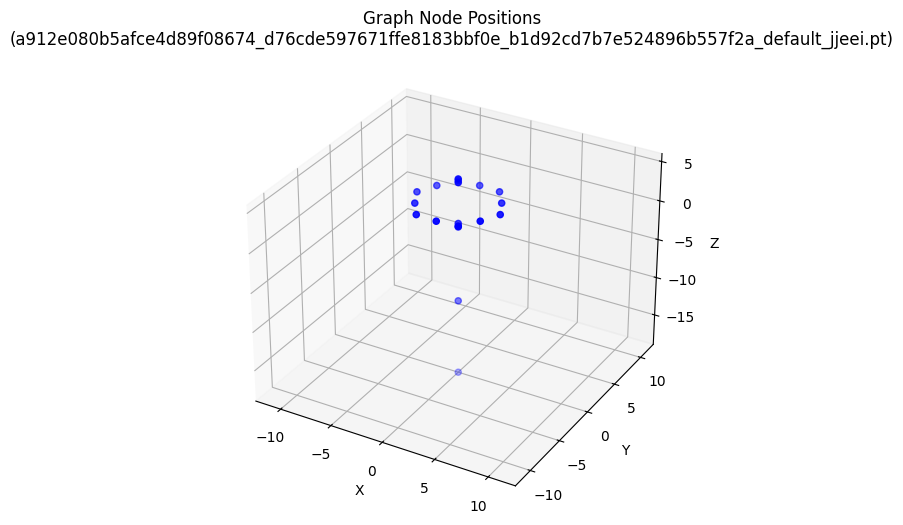

In [4]:
import os
import random
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from torch_geometric.data import Data

# --- CONFIGURATION ---
GRAPH_DIR = "graphs/parts"
# ---------------------

def inspect_random_graph(base_dir):
    # 1. Find a random file
    subfolders = sorted([f for f in os.listdir(base_dir) if f.startswith("part_gr")])
    if not subfolders:
        print("❌ No graph folders found!")
        return

    chosen_folder = random.choice(subfolders)
    full_folder_path = os.path.join(base_dir, chosen_folder)
    
    files = [f for f in os.listdir(full_folder_path) if f.endswith(".pt")]
    if not files:
        print(f"❌ No .pt files in {chosen_folder}")
        return

    chosen_file = random.choice(files)
    path = os.path.join(full_folder_path, chosen_file)
    
    print(f"🔍 Inspecting: {path}")
    
    # 2. Load Data (FIXED: added weights_only=False)
    try:
        data = torch.load(path, weights_only=False)
    except Exception as e:
        print(f"❌ CORRUPT FILE: {e}")
        return

    # 3. Print Statistics
    num_nodes = data.x.shape[0]
    num_edges = data.edge_index.shape[1]
    num_features = data.x.shape[1]
    
    print("-" * 30)
    print(f"✅ Status:      LOAD SUCCESS")
    print(f"Nodes (Faces): {num_nodes}")
    print(f"Edges (Links): {num_edges}")
    print(f"Features/Node: {num_features}")
    
    # 4. Validation Checks
    print("-" * 30)
    if data.x.isnan().any():
        print("❌ WARNING: Contains NaN values (Bad features)")
    else:
        print("✅ Data Check:  No NaNs found")
        
    if num_edges == 0 and num_nodes > 1:
        print("⚠️ WARNING:   Graph has no edges (Disconnected faces?)")
    else:
        print("✅ Connectivity: Graph has edges")
        
    if num_features == 14:
        print("✅ Dimensions:  Correct (14)")
    else:
        print(f"⚠️ WARNING:   Unexpected feature size: {num_features}")

    # 5. Visualize (Plot Centroids)
    # Columns 1, 2, 3 are X, Y, Z centroids
    centroids = data.x[:, 1:4].numpy()
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    # Plot centroids
    ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], c='b', marker='o', s=20)
    
    # Make axes proportional for better visualization
    # (Simple trick to keep 3D aspect ratio somewhat correct)
    x_range = centroids[:,0].max() - centroids[:,0].min()
    y_range = centroids[:,1].max() - centroids[:,1].min()
    z_range = centroids[:,2].max() - centroids[:,2].min()
    max_range = max(x_range, y_range, z_range)
    
    mid_x = (centroids[:,0].max() + centroids[:,0].min()) * 0.5
    mid_y = (centroids[:,1].max() + centroids[:,1].min()) * 0.5
    mid_z = (centroids[:,2].max() + centroids[:,2].min()) * 0.5
    
    ax.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
    ax.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
    ax.set_zlim(mid_z - max_range/2, mid_z + max_range/2)

    ax.set_title(f"Graph Node Positions\n({chosen_file})")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()

# Run the inspector
inspect_random_graph(GRAPH_DIR)

# for ASSEMBLIES

## assembly_graph_builder.py

### Rebuild the JSON index (REQUIRED once per session)

In [4]:
import os

ASSEMBLY_ROOT = "../Automate/assemblies"

assembly_json_index = {}

for root, _, files in os.walk(ASSEMBLY_ROOT):
    for f in files:
        if f.endswith(".json"):
            aid = f.replace(".json", "")
            assembly_json_index[aid] = os.path.join(root, f)

print("Indexed assemblies:", len(assembly_json_index))


Indexed assemblies: 255211


### Pick ONE assembly ID safely

In [2]:
import pikepdf

input_pdf = "/home/swapnil/Desktop/Thesis_ED22S009.pdf"
output_pdf = "/home/swapnil/Desktop/Thesis_ED22S009_no_first_page.pdf"

with pikepdf.open(input_pdf) as pdf:
    del pdf.pages[0]   # remove first page
    pdf.save(output_pdf)

print("First page deleted successfully.")


First page deleted successfully.


In [5]:
some_assembly_id = next(iter(assembly_json_index.keys()))
print(some_assembly_id)


e197def223d83d6366af9bf4_4313769447d67f21432107bd_73532ebd71b493a59666cd8f_default


### Load part embeddings (example)

In [11]:
import torch
import os

PART_GRAPH_DIR = "../project/graphs/parts"

def load_part_embedding(part_id):
    # adjust if your folder logic differs
    for root, _, files in os.walk(PART_GRAPH_DIR):
        if part_id + ".pt" in files:
            data = torch.load(os.path.join(root, part_id + ".pt"))
            return data.x.mean(dim=0)
    return None


### Build ONE assembly graph

In [17]:
import json
from embedding_utils import index_part_graphs, load_part_embedding_from_index
from assembly_graph_builder import build_assembly_graph

PART_GRAPH_DIR = "../project/graphs/parts"
part_index = index_part_graphs(PART_GRAPH_DIR)

# pick one assembly
some_assembly_id = next(iter(assembly_json_index.keys()))
assembly_json_path = assembly_json_index[some_assembly_id]

with open(assembly_json_path) as f:
    assembly = json.load(f)

part_embeddings = {}
missing_parts = []

for p in assembly["parts"]:
    pid = p["id"]
    if pid in part_embeddings:
        continue
    emb = load_part_embedding_from_index(pid, part_index)
    if emb is None:
        missing_parts.append(pid)
    else:
        part_embeddings[pid] = emb

print("unique parts in assembly:", len({p['id'] for p in assembly['parts']}))
print("embeddings found:", len(part_embeddings))
print("missing:", len(missing_parts))
print("example missing:", missing_parts[:3])

# Option: skip if missing parts
if missing_parts:
    print("Skipping this assembly because some parts have no graphs.")
else:
    g = build_assembly_graph(assembly_json_path, part_embeddings)
    print(g)


unique parts in assembly: 2
embeddings found: 0
missing: 2
example missing: ['e197def223d83d6366af9bf4_4313769447d67f21432107bd_d7ce8501f0e9aabce4aacf6e_default_jndhmra', 'e197def223d83d6366af9bf4_4313769447d67f21432107bd_d7ce8501f0e9aabce4aacf6e_default_jndhera']
Skipping this assembly because some parts have no graphs.


### assembly_graph_pyg.py

In [1]:
from assembly_graph_pyg import AssemblyGraphDataset

ds = AssemblyGraphDataset("assembly_filter_out/assembly_graphs_v1.jsonl", feature_dim=64)
d0 = ds[0]
d0


/home/swapnil/anaconda3/envs/occ310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data(x=[15, 64], edge_index=[2, 28], edge_attr=[28, 1], part_ids=[15], assembly_path='/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/assemblies/asm_00000/01984c6ecc641bbea1b098c1_7cf8f9bc95fd3a123d51b6d4_d8e061ba74a1304ea959b3f8_default.json', assembly_id='01984c6ecc641bbea1b098c1_7cf8f9bc95fd3a123d51b6d4_d8e061ba74a1304ea959b3f8_default')

### forward pass on a small batch

In [2]:
import torch
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool

# 1) DataLoader
loader = DataLoader(ds, batch_size=8, shuffle=True)

# 2) Minimal GNN model
class TinyGNN(torch.nn.Module):
    def __init__(self, in_dim, hidden_dim=64, out_dim=32):
        super().__init__()
        self.conv1 = GCNConv(in_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.lin = torch.nn.Linear(hidden_dim, out_dim)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = global_mean_pool(x, batch)   # graph-level embedding
        return self.lin(x)

# 3) Run one forward pass
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TinyGNN(in_dim=ds[0].x.shape[1]).to(device)

batch = next(iter(loader)).to(device)
out = model(batch)

print("Batch graphs:", batch.num_graphs)
print("Batch nodes:", batch.num_nodes)
print("Output shape:", out.shape)  # expected: [batch_size, out_dim]


Batch graphs: 8
Batch nodes: 52
Output shape: torch.Size([8, 32])


### After embeddings are created /project/part_embeddings_struct.py

In [1]:
import torch
from assembly_graph_pyg import AssemblyGraphDataset

part_embeddings = torch.load("part_embeddings.pt", map_location="cpu")

ds = AssemblyGraphDataset(
    "assembly_filter_out/assembly_graphs_v1.jsonl",
    part_embeddings=part_embeddings
)

print(ds[0])


/home/swapnil/anaconda3/envs/occ310/lib/python3.10/site-packages/torch/__config__.py:9: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:119.)
  return torch._C._show_config()
/home/swapnil/anaconda3/envs/occ310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data(x=[15, 8], edge_index=[2, 28], edge_attr=[28, 1], part_ids=[15], assembly_path='/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/assemblies/asm_00000/01984c6ecc641bbea1b098c1_7cf8f9bc95fd3a123d51b6d4_d8e061ba74a1304ea959b3f8_default.json', assembly_id='01984c6ecc641bbea1b098c1_7cf8f9bc95fd3a123d51b6d4_d8e061ba74a1304ea959b3f8_default')


### plug embeddings into the AssemblyGraphDataset

In [2]:
import torch
from assembly_graph_pyg import AssemblyGraphDataset

part_embeddings = torch.load("part_embeddings.pt", map_location="cpu")

ds = AssemblyGraphDataset(
    "assembly_filter_out/assembly_graphs_v1.jsonl",
    part_embeddings=part_embeddings
)

d0 = ds[0]
print(d0)
print("x dim:", d0.x.shape[1])


Data(x=[15, 8], edge_index=[2, 28], edge_attr=[28, 1], part_ids=[15], assembly_path='/media/swapnil/3f73cc1a-8f9d-4c19-87af-99b3512ff5b2/MK_S/Automate/assemblies/asm_00000/01984c6ecc641bbea1b098c1_7cf8f9bc95fd3a123d51b6d4_d8e061ba74a1304ea959b3f8_default.json', assembly_id='01984c6ecc641bbea1b098c1_7cf8f9bc95fd3a123d51b6d4_d8e061ba74a1304ea959b3f8_default')
x dim: 8


### do all assemblies have embeddings coverage?

If any part id is missing in embeddings, dataset loading will throw an error.
Run this quick coverage test on the first 200 assemblies:

In [3]:
import json
from pathlib import Path

GRAPHS = Path("assembly_filter_out/assembly_graphs_v1.jsonl")

missing_parts = 0
checked = 0

with GRAPHS.open() as f:
    for i, line in enumerate(f):
        if i >= 200:
            break
        rec = json.loads(line)
        assembly_path = rec["assembly_path"]

        assembly = json.load(open(assembly_path))
        for p in assembly.get("parts", []):
            pid = p.get("id")
            if isinstance(pid, str) and pid not in part_embeddings:
                missing_parts += 1

        checked += 1

print("Checked assemblies:", checked)
print("Missing part embeddings (count):", missing_parts)


Checked assemblies: 200
Missing part embeddings (count): 0


### forward pass again (now meaningful features)

Run the same forward-pass cell, just adjust in_dim=8 automatically:

In [4]:
import torch
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool

loader = DataLoader(ds, batch_size=8, shuffle=True)

class TinyGNN(torch.nn.Module):
    def __init__(self, in_dim, hidden_dim=64, out_dim=32):
        super().__init__()
        self.conv1 = GCNConv(in_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.lin = torch.nn.Linear(hidden_dim, out_dim)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = global_mean_pool(x, batch)
        return self.lin(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TinyGNN(in_dim=ds[0].x.shape[1]).to(device)

batch = next(iter(loader)).to(device)
out = model(batch)

print("Batch graphs:", batch.num_graphs)
print("Batch nodes:", batch.num_nodes)
print("Output shape:", out.shape)
print("Example output row:", out[0].detach().cpu()[:10])


Batch graphs: 8
Batch nodes: 54
Output shape: torch.Size([8, 32])
Example output row: tensor([-11.5599,   1.2686,   0.2098,  -7.7461,   2.3158,  10.3526,  -4.5878,
          1.2437,  -1.6411,  -7.4853])
